<a href="https://colab.research.google.com/github/AdrianGabryla/Fashion-MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



Size and labels of the data set

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('Train: ', train_images.shape)
print('Test: ', test_images.shape)

Train:  (60000, 28, 28)
Test:  (10000, 28, 28)


Show random object from the training set

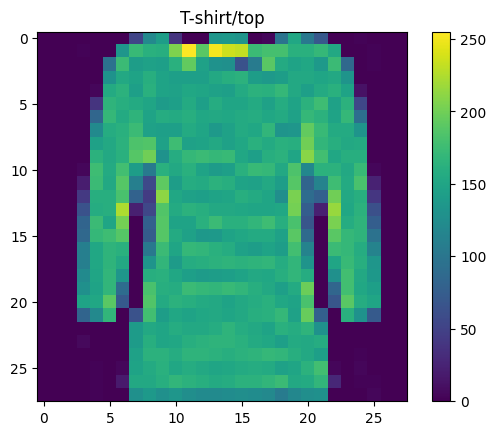

In [5]:
i = random.randrange(0, 59999)
plt.imshow(train_images[i], cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title(f'{labels[train_labels[i]]}')
plt.show()

Getting values from 0 to 1

In [6]:
train_images = train_images/255.0
test_images = test_images/255.0

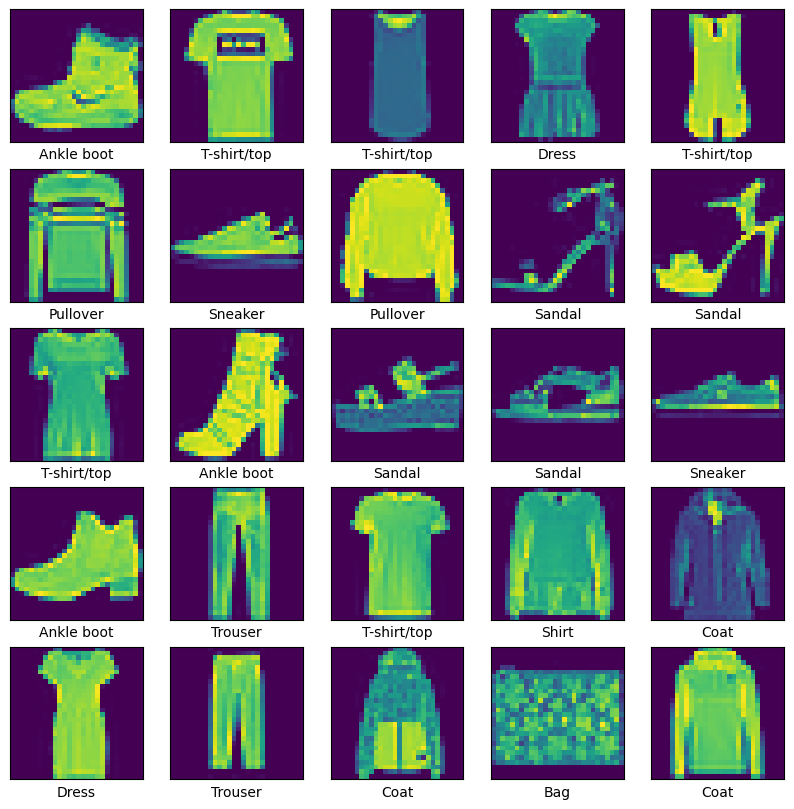

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(labels[train_labels[i]])
plt.show()

In [8]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_labels, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7654 - loss: 0.6678 - val_accuracy: 0.8522 - val_loss: 0.4202
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8611 - loss: 0.3914 - val_accuracy: 0.8533 - val_loss: 0.4212
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8736 - loss: 0.3473 - val_accuracy: 0.8757 - val_loss: 0.3459
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8835 - loss: 0.3154 - val_accuracy: 0.8695 - val_loss: 0.3592
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8883 - loss: 0.3016 - val_accuracy: 0.8777 - val_loss: 0.3383
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8951 - loss: 0.2823 - val_accuracy: 0.8856 - val_loss: 0.3186
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8992 - loss: 0.2730 - val_accuracy: 0.8843 - val_loss: 0.3243
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9021 - loss: 0.2593

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8779 - loss: 0.3638

Test accuracy: 0.8779000043869019


In [12]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


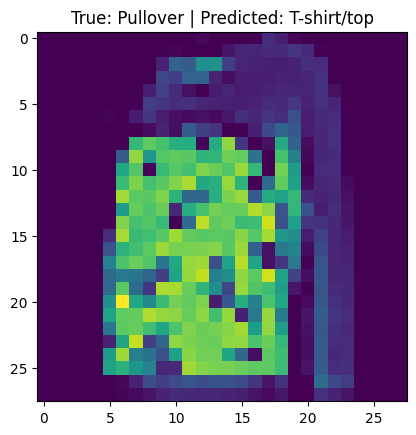

In [13]:
i = random.randrange(0, 9999)
plt.imshow(test_images[i], cmap='viridis', interpolation='nearest')
plt.title(f'True: {labels[test_labels[i]]} | Predicted: {labels[np.argmax(predictions[i])]}')
plt.show()

Confusion matrix to show how well the model classified each type of clothing item

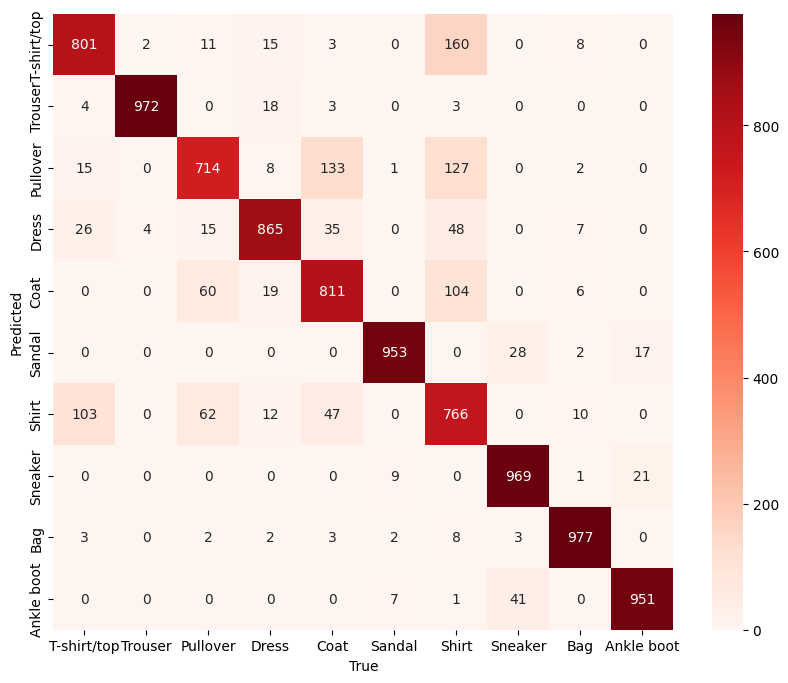

In [14]:
test_predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, test_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

Model B to compare the results after tunning hyperparameters

In [15]:
model_b = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model_b.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
history_b = model_b.fit(train_images, train_labels, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7583 - loss: 0.6649 - val_accuracy: 0.8561 - val_loss: 0.3957
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8462 - loss: 0.4105 - val_accuracy: 0.8729 - val_loss: 0.3532
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8650 - loss: 0.3676 - val_accuracy: 0.8694 - val_loss: 0.3521
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8695 - loss: 0.3512 - val_accuracy: 0.8758 - val_loss: 0.3394
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8785 - loss: 0.3277 - val_accuracy: 0.8838 - val_loss: 0.3278
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8818 - loss: 0.3190 - val_accuracy: 0.8784 - val_loss: 0.3357
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8832 - loss: 0.3142 - val_accuracy: 0.8747 - val_loss: 0.3587
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8854 -

In [17]:
test_loss_b, test_acc_b = model_b.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy:', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.8856 - loss: 0.3441
Test accuracy: 0.8779000043869019


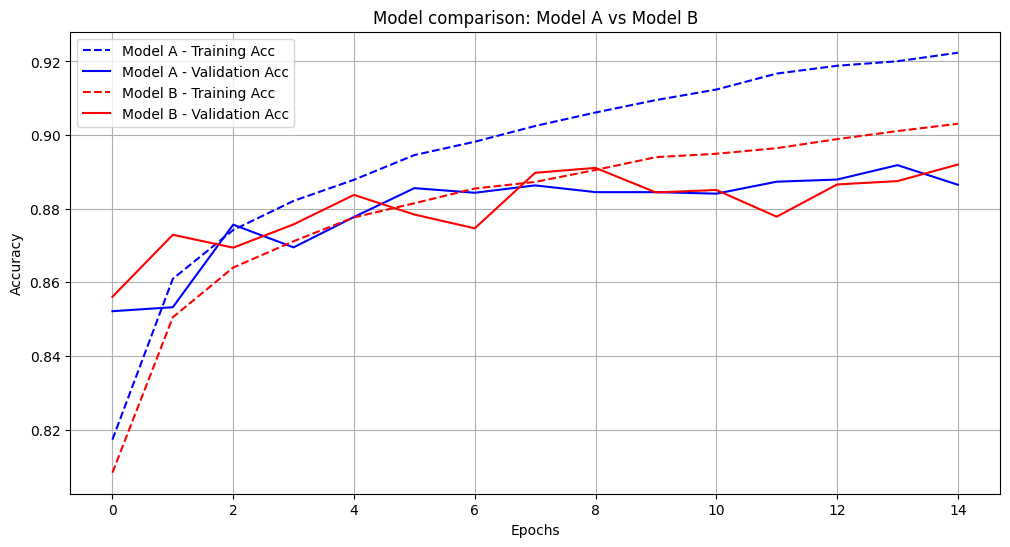

In [18]:
plt.figure(figsize=(12, 6))

plt.plot(history.history['accuracy'], label='Model A - Training Acc', color='blue', linestyle='--')
plt.plot(history.history['val_accuracy'], label='Model A - Validation Acc', color='blue')
plt.plot(history_b.history['accuracy'], label='Model B - Training Acc', color='red', linestyle='--')
plt.plot(history_b.history['val_accuracy'], label='Model B - Validation Acc', color='red')

plt.title('Model comparison: Model A vs Model B')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()